In [21]:
import numpy as np
import string
import math
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sn
from UnFaIR import *
import scipy as sp

In [22]:
RCP3PD_E = pd.read_csv('./RCP_data/RCP3PD_EMISSIONS.csv',skiprows=36,index_col=0)

emissions = pd.DataFrame(data = np.array([RCP3PD_E[['OtherCO2','FossilCO2']].sum(axis=1).values,RCP3PD_E['CH4'].values,RCP3PD_E['N2O'].values]).T,columns=['CO2','CH4','N2O'],index = RCP3PD_E.index)

# Show emissions input format:

print(emissions)

                    CO2         CH4       N2O
v YEARS/GAS >                                
1765           0.003000    0.000000  0.000000
1766           0.008338    1.963262  0.005191
1767           0.013677    2.436448  0.010117
1768           0.019015    2.911105  0.015043
1769           0.024353    3.387278  0.019969
1770           0.029691    3.865015  0.024896
1771           0.036030    4.344362  0.029822
1772           0.041368    4.825372  0.034750
1773           0.046706    5.308094  0.039677
1774           0.052045    5.792582  0.044605
1775           0.057383    6.278890  0.049533
1776           0.062721    6.767074  0.054461
1777           0.068060    7.257194  0.059390
1778           0.073398    7.749308  0.064319
1779           0.078736    8.243478  0.069248
1780           0.084074    8.739767  0.074178
1781           0.090413    9.238243  0.079109
1782           0.095751    9.738971  0.084039
1783           0.101089   10.242021  0.088970
1784           0.106428   10.74746

In [23]:
# Parameter input format:

print(default_gas_params())
print()
print(default_forcing_params())
print()
print(default_thermal_params())

                      CO2         CH4         N2O
a1               0.217300    1.000000    1.000000
a2               0.224000    0.000000    0.000000
a3               0.282400    0.000000    0.000000
a4               0.276300    0.000000    0.000000
tau1       1000000.000000    9.150000  116.000000
tau2           394.400000    1.000000    1.000000
tau3            36.540000    1.000000    1.000000
tau4             4.304000    1.000000    1.000000
r0              37.493303    8.540000   67.231092
rC               0.001909    0.000000    0.000000
rT               3.616153   -0.360000    0.000000
rA               0.000000    0.000310   -0.000906
PI_conc        278.000000  700.000000  273.000000
emis2conc        0.468952    0.351714    0.200980

         CO2    CH4   N2O
f1  5.395679  0.000  0.00
f2  0.000000  0.000  0.00
f3  0.000000  0.036  0.12

        1     2
d  239.00  4.10
q    0.33  0.41


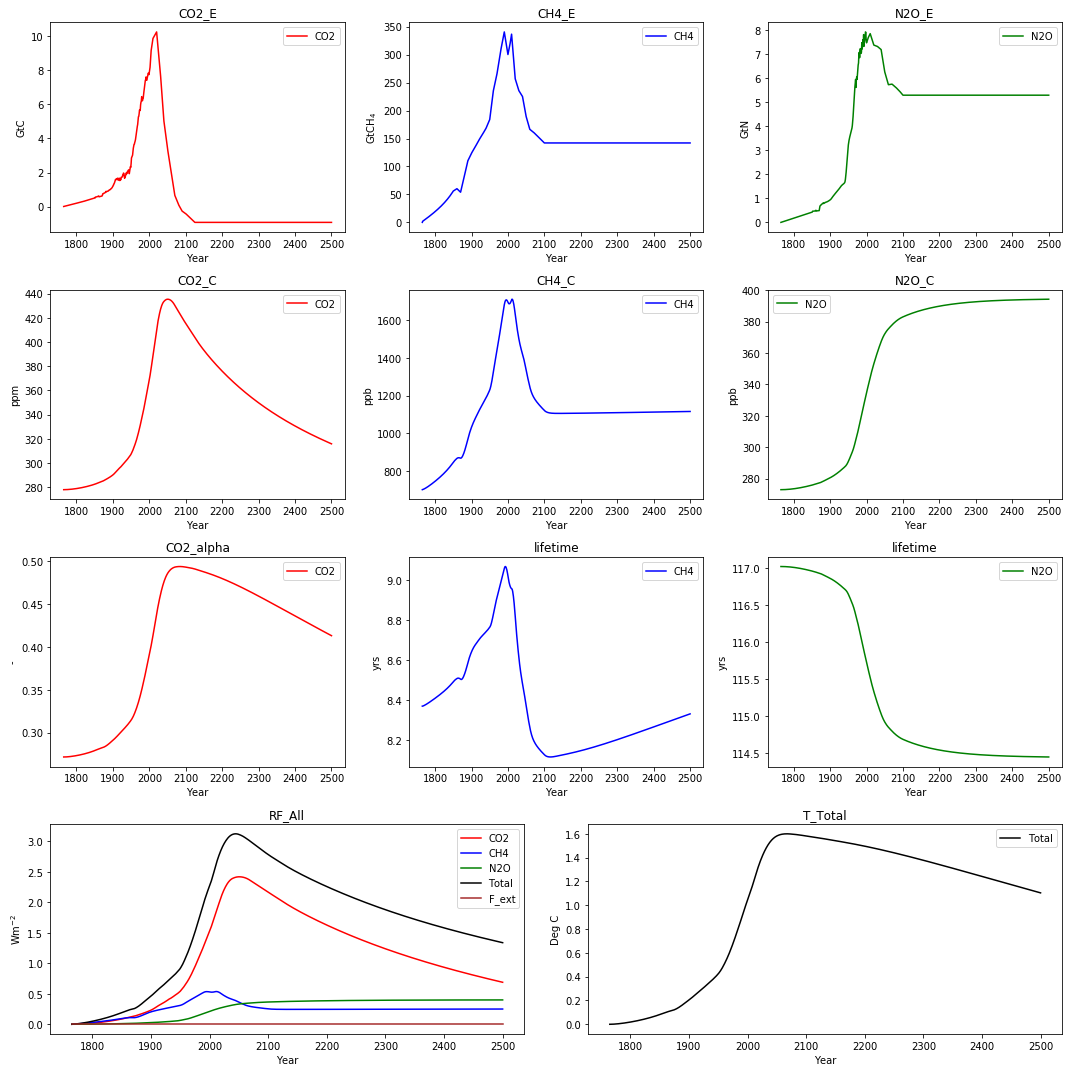

In [24]:
# Example run and plotting script for all gases:

gas_params = default_gas_params()
forcing_params = default_forcing_params()
thermal_params = default_thermal_params()

output = UnFaIR(emissions_in=emissions,F_ext=0,gas_params=gas_params,forcing_params=forcing_params,thermal_params=thermal_params)

# Plot all simply plots everything the model outputs, CANNOT be used for comparison (yet)
plot_all(emissions,output,gas_params)


Text(0.5, 1.0, 'Temperature')

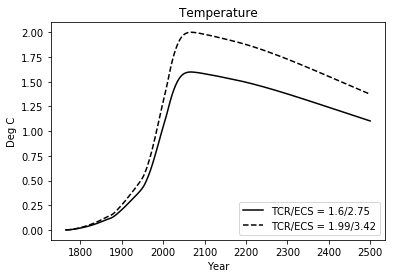

In [36]:
# To change model TCR / ECS (default 1.6 / 2.75) , use tcrecs_to_q as follows:

q_new = tcrecs_to_q(1.99,3.42)
thermal_params_new = thermal_params.copy()
thermal_params_new.loc['q'] = q_new

output_1 = UnFaIR(emissions_in=emissions,F_ext=0,gas_params=gas_params,forcing_params=forcing_params,thermal_params=thermal_params_new)

## Demonstrate Temperature comparison for the  plot:

fig,ax=plt.subplots()
output['T'].Total.plot(ax=ax,color='k',label='TCR/ECS = 1.6/2.75')
output_1['T'].Total.plot(ax=ax,color='k',linestyle='--',label='TCR/ECS = 1.99/3.42')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Deg C')
ax.set_title('Temperature')

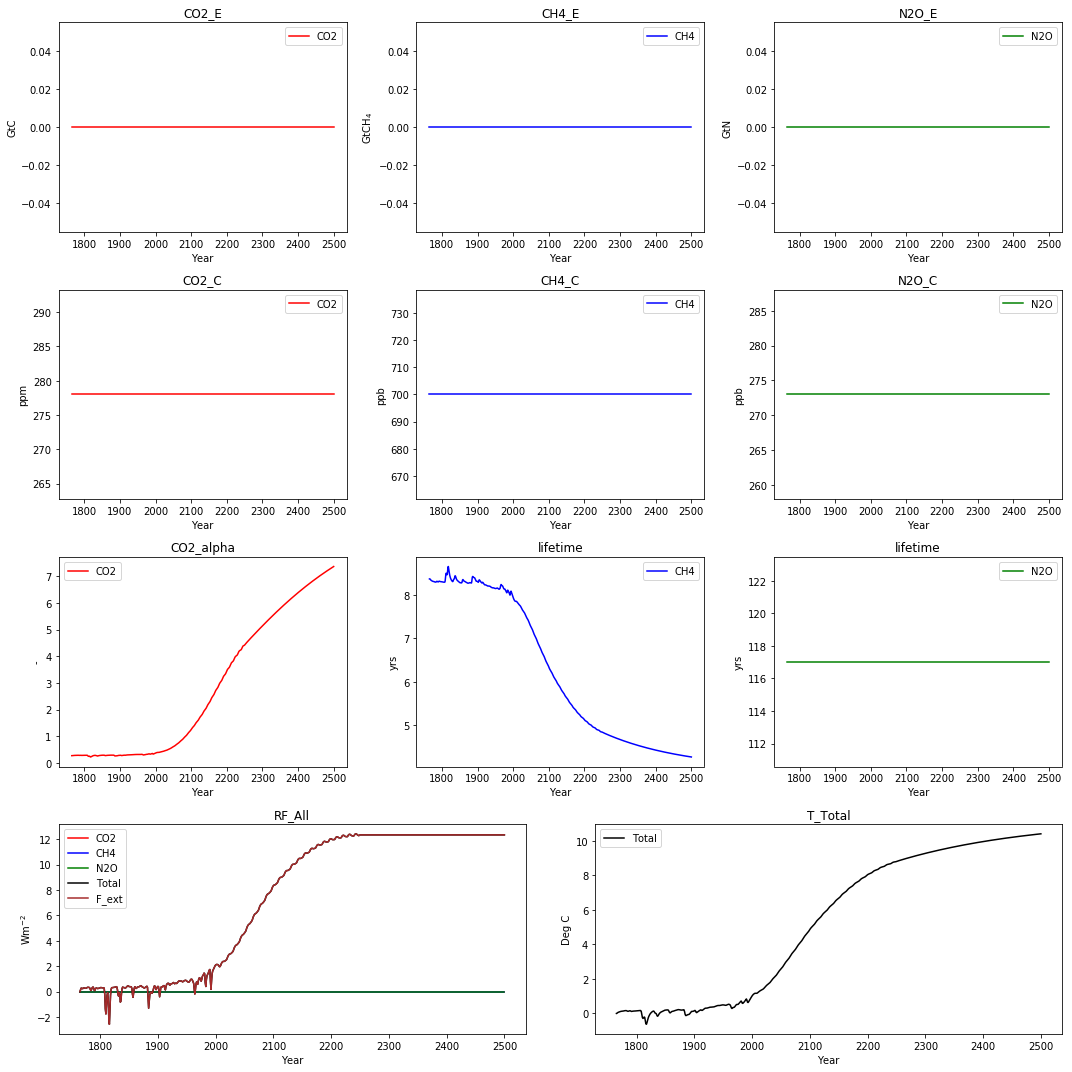

In [26]:
## Running an external forcing timeseries:

# To run a forcing timeseries, supply an array to F_ext, and a dataframe of zeros to emissions:

RCP85_forc = pd.read_csv('./RCP_data/RCP85_MIDYEAR_RADFORCING.csv',skiprows=58,index_col=0)

empty_ems = pd.DataFrame(index=RCP85_forc.index,columns=['CO2','CH4','N2O']).fillna(0.)

RCP85_forcings = RCP85_forc.TOTAL_INCLVOLCANIC_RF.values

forcing_output = UnFaIR(emissions_in=empty_ems,F_ext=RCP85_forcings,gas_params=gas_params,forcing_params=forcing_params,thermal_params=thermal_params_new)

plot_all(empty_ems,forcing_output,gas_params)

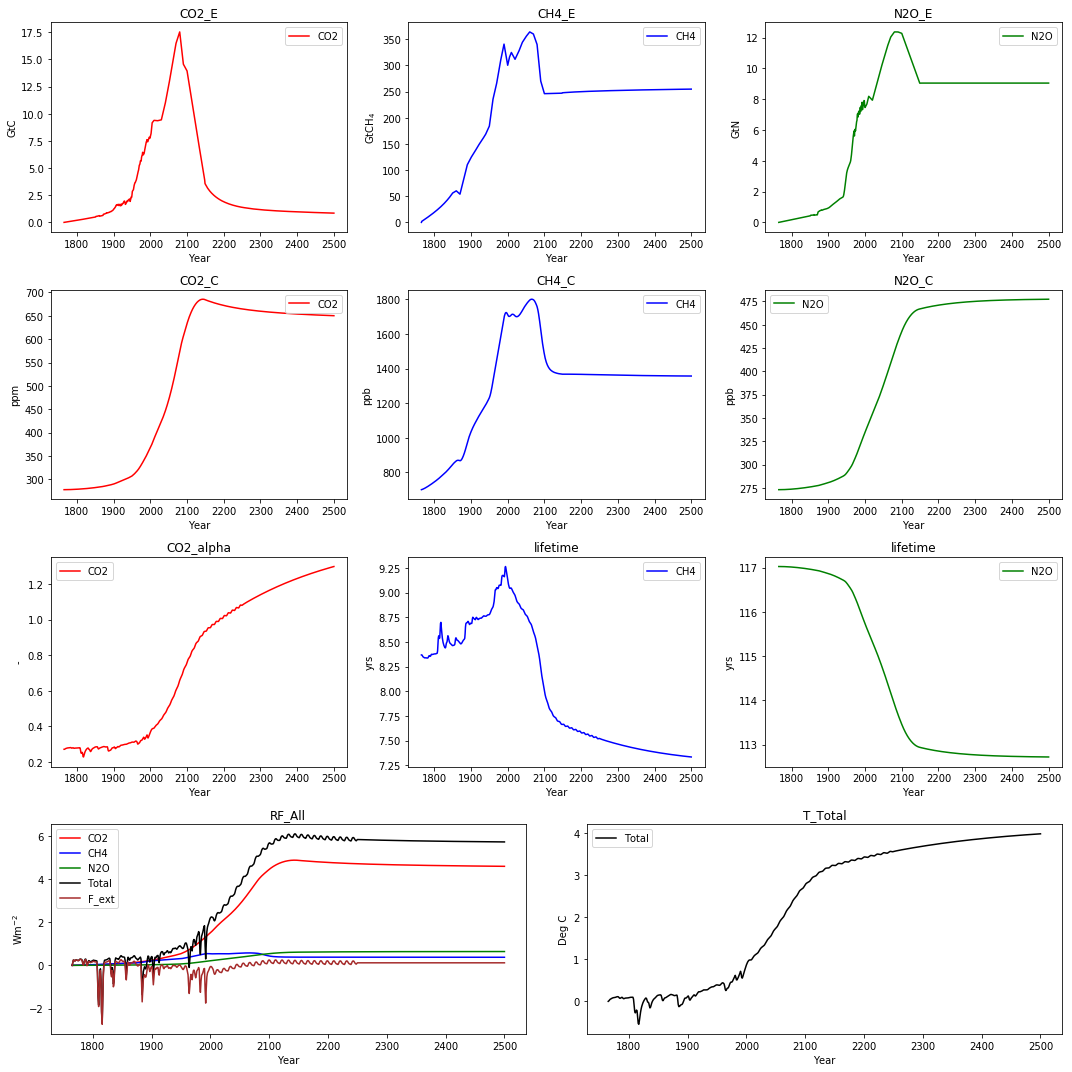

In [27]:
## To run a combination of emissions / forcing, ensure that the array & dataframe are the same length:

RCP6_forc = pd.read_csv('./RCP_data/RCP85_MIDYEAR_RADFORCING.csv',skiprows=58,index_col=0)
RCP6_other_forcing = RCP6_forc.TOTAL_INCLVOLCANIC_RF.values - RCP6_forc.CO2CH4N2O_RF.values

RCP6_E = pd.read_csv('./RCP_data/RCP6_EMISSIONS.csv',skiprows=36,index_col=0)

RCP6_emissions = pd.DataFrame(data = np.array([RCP6_E[['OtherCO2','FossilCO2']].sum(axis=1).values,RCP6_E['CH4'].values,RCP6_E['N2O'].values]).T,columns=['CO2','CH4','N2O'],index = RCP6_E.index)

RCP6_output = UnFaIR(emissions_in=RCP6_emissions,F_ext=RCP6_other_forcing,gas_params=gas_params,forcing_params=forcing_params,thermal_params=thermal_params)

plot_all(RCP6_emissions,RCP6_output,gas_params)

In [28]:
# If emissions and forcing lengths don't match, you get this error:

UnFaIR(emissions_in=RCP6_emissions,F_ext=RCP6_other_forcing[:-1],gas_params=gas_params,forcing_params=forcing_params,thermal_params=thermal_params)

'ERROR : External forcing length does not equal emissions input length'